In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import cross_val_score

## Input From excel file from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#   link drive with colab & provide path

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/my Work/My Projects/Data science/MY PROJECTS/Air Quality Index Prediction/FinalData.csv', parse_dates=['Date'], index_col=['Date']) 
df.head()

,PM10,NO2,SO2,Ozone,Temp,RH,WS,AQI,date
Date,,,,,,,,,
2016-03-30,128.32,47.91,73.43,104.06,42.10,17.98,0.72,118.8809,30-Mar-2016 - 00:00
2016-03-31,93.64,26.55,20.75,103.50,42.46,16.17,0.62,105.1471,31-Mar-2016 - 00:00
2016-04-01,116.14,98.96,13.53,31.39,38.07,17.97,0.53,118.9600,01-Apr-2016 - 00:00
2016-04-02,136.36,117.28,13.11,44.69,37.27,21.58,0.56,137.2800,02-Apr-2016 - 00:00
2016-04-03,147.09,84.06,16.81,27.49,33.12,34.27,0.45,131.3949,03-Apr-2016 - 00:00


In [ ]:
# df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sheets for colab/FinalData.csv', parse_dates=['Date'], index_col=['Date']) 
# df.head()

## Data Pre-Processing

In [ ]:
df.isna().sum()       # how many empty values present in Dataset

PM10      1
NO2       0
SO2       0
Ozone     0
Temp     50
RH       24
WS        0
AQI       0
date      0
dtype: int64

In [ ]:
df=df.fillna(method='ffill')        # fill all Empty values with Previous value

In [ ]:
df.isna().sum()

PM10     0
NO2      0
SO2      0
Ozone    0
Temp     0
RH       0
WS       0
AQI      0
date     0
dtype: int64

# Visualization

In [ ]:
plt.plot(df.index, df.AQI)


<br>
<br>
<br>


## 2/3 for training  &  1/3 for testing

In [ ]:
input_columns=df.drop(['AQI', 'date'],1)
input_columns.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,PM10,NO2,SO2,Ozone,Temp,RH,WS
Date,,,,,,,
2016-03-30,128.32,47.91,73.43,104.06,42.10,17.98,0.72
2016-03-31,93.64,26.55,20.75,103.50,42.46,16.17,0.62
2016-04-01,116.14,98.96,13.53,31.39,38.07,17.97,0.53
2016-04-02,136.36,117.28,13.11,44.69,37.27,21.58,0.56
2016-04-03,147.09,84.06,16.81,27.49,33.12,34.27,0.45


In [ ]:
output_columns=df.AQI
output_columns.astype('int64') 

Date
2016-03-30    118
2016-03-31    105
2016-04-01    118
2016-04-02    137
2016-04-03    131
             ... 
2021-12-26    100
2021-12-27    113
2021-12-28     97
2021-12-29     56
2021-12-30     71
Name: AQI, Length: 2064, dtype: int64

In [ ]:
x_train, x_test2, y_train, y_test2 = train_test_split(input_columns, output_columns, test_size=0.3) 

In [ ]:
x_validation, x_test, y_validation, y_test = train_test_split(x_test2, y_test2, test_size=0.5) 

<br>
<br>
<br>

# Statistics

### Basic statistics of Air Quality Data

In [ ]:
df.head()

,PM10,NO2,SO2,Ozone,Temp,RH,WS,AQI,date
Date,,,,,,,,,
2016-03-30,128.32,47.91,73.43,104.06,42.10,17.98,0.72,118.8809,30-Mar-2016 - 00:00
2016-03-31,93.64,26.55,20.75,103.50,42.46,16.17,0.62,105.1471,31-Mar-2016 - 00:00
2016-04-01,116.14,98.96,13.53,31.39,38.07,17.97,0.53,118.9600,01-Apr-2016 - 00:00
2016-04-02,136.36,117.28,13.11,44.69,37.27,21.58,0.56,137.2800,02-Apr-2016 - 00:00
2016-04-03,147.09,84.06,16.81,27.49,33.12,34.27,0.45,131.3949,03-Apr-2016 - 00:00


In [ ]:
print("            MIN         MAX          MEDIAN         MEAN          SD          COV            N")
print()
mean=df.SO2.mean()
std=df.SO2.std()
print(f" SO2        {df.SO2.min():.2f}        {df.SO2.max():.2f}        {df.SO2.median():.2f}           {mean:.2f}          {std:.2f}        {(std/mean)*100:.2f}        {df.SO2.count()}")

mean=df.NO2.mean()
std=df.NO2.std()
print(f" NO2        {df.NO2.min():.2f}        {df.NO2.max():.2f}       {df.NO2.median():.2f}          {mean:.2f}         {std:.2f}       {(std/mean)*100:.2f}         {df.NO2.count()}")

mean=df.PM10.mean()
std=df.PM10.std()
print(f" PM10       {df.PM10.min():.2f}        {df.PM10.max():.2f}       {df.PM10.median():.2f}          {mean:.2f}         {std:.2f}       {(std/mean)*100:.2f}         {df.PM10.count()}")

mean=df.Ozone.mean()
std=df.Ozone.std()
print(f" Ozone      {df.Ozone.min():.2f}        {df.Ozone.max():.2f}       {df.Ozone.median():.2f}          {mean:.2f}         {std:.2f}       {(std/mean)*100:.2f}         {df.Ozone.count()}")

mean=df.Temp.mean()
std=df.Temp.std()
print(f" Temp       {df.Temp.min():.2f}        {df.Temp.max():.2f}        {df.Temp.median():.2f}          {mean:.2f}         {std:.2f}        {(std/mean)*100:.2f}         {df.Temp.count()}")

mean=df.RH.mean()
std=df.RH.std()
print(f" RH         {df.RH.min():.2f}        {df.RH.max():.2f}        {df.RH.median():.2f}          {mean:.2f}         {std:.2f}       {(std/mean)*100:.2f}         {df.RH.count()}")

mean=df.WS.mean()
std=df.WS.std()
print(f" WS         {df.WS.min():.2f}        {df.WS.max():.2f}        {df.WS.median():.2f}           {mean:.2f}          {std:.2f}        {(std/mean)*100:.2f}        {df.WS.count()}")


            MIN         MAX          MEDIAN         MEAN          SD          COV            N

 SO2        0.03        73.43        5.70           8.96          9.28        103.54        2064
 NO2        0.04        230.72       28.38          34.82         23.24       66.76         2064
 PM10       9.23        241.14       73.09          77.77         37.96       48.81         2064
 Ozone      0.32        180.36       41.43          45.14         31.99       70.87         2064
 Temp       2.23        42.46        28.53          28.22         6.15        21.78         2064
 RH         9.51        99.44        57.68          58.06         18.47       31.81         2064
 WS         0.14        13.05        0.51           0.69          0.84        121.83        2064


<br>
<br>
<br>
<br>
<br>
<br>

## Seasonal Statistics 

In [ ]:
df

,PM10,NO2,SO2,Ozone,Temp,RH,WS,AQI,date
Date,,,,,,,,,
2016-03-30,128.32,47.91,73.43,104.06,42.10,17.98,0.72,118.8809,30-Mar-2016 - 00:00
2016-03-31,93.64,26.55,20.75,103.50,42.46,16.17,0.62,105.1471,31-Mar-2016 - 00:00
2016-04-01,116.14,98.96,13.53,31.39,38.07,17.97,0.53,118.9600,01-Apr-2016 - 00:00
2016-04-02,136.36,117.28,13.11,44.69,37.27,21.58,0.56,137.2800,02-Apr-2016 - 00:00
2016-04-03,147.09,84.06,16.81,27.49,33.12,34.27,0.45,131.3949,03-Apr-2016 - 00:00
...,...,...,...,...,...,...,...,...,...
2021-12-26,100.27,27.17,8.66,50.72,21.97,67.35,0.41,100.1800,26-Dec-2021 - 00:00
2021-12-27,120.54,27.38,16.76,50.63,22.38,67.90,0.40,113.6940,27-Dec-2021 - 00:00
2021-12-28,97.83,27.20,9.48,50.62,21.82,68.52,0.50,97.8300,28-Dec-2021 - 00:00


In [ ]:
df.index

DatetimeIndex(['2016-03-30', '2016-03-31', '2016-04-01', '2016-04-02',
               '2016-04-03', '2016-04-04', '2016-04-05', '2016-04-06',
               '2016-04-07', '2016-04-08',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=2064, freq=None)

In [ ]:
summer1 = df['2016-02':'2016-05']
summer2 = df['2017-02':'2017-05']
summer3 = df['2018-02':'2018-05']
summer4 = df['2019-02':'2019-05']
summer5 = df['2020-02':'2020-05']
summer6 = df['2021-02':'2021-05']

rain1 = df['2016-06':'2016-09']
rain2 = df['2017-06':'2017-09']
rain3 = df['2018-06':'2018-09']
rain4 = df['2019-06':'2019-09']
rain5 = df['2020-06':'2020-09']
rain6 = df['2021-06':'2021-09']

winter1 = df['2016-10':'2017-01']
winter2 = df['2017-10':'2018-01']
winter3 = df['2018-10':'2019-01']
winter4 = df['2019-10':'2020-01']
winter5 = df['2020-10':'2021-01']
winter6 = df['2021-10':'2021-12']

In [ ]:
from operator import concat
summer = pd.concat([summer1,summer2,summer3,summer4,summer5, summer6])
rain = pd.concat([rain1,rain2,rain3,rain4,rain5,rain6])
winter = pd.concat([winter1,winter2,winter3,winter4,winter5,winter6])

In [ ]:
print("               MIN         MAX          MEDIAN         MEAN          SD          COV           N")
print()

mean=df.AQI.mean()
std=df.AQI.std()
print(f" ANNUAL        {df.AQI.min():.2f}       {df.AQI.max():.2f}       {df.AQI.median():.2f}          {mean:.2f}         {std:.2f}       {(std/mean)*100:.2f}        {df.WS.count()}")


mean=summer.AQI.mean()
std=summer.AQI.std()
print(f" SUMMER        {summer.AQI.min():.2f}       {summer.AQI.max():.2f}       {summer.AQI.median():.2f}          {mean:.2f}         {std:.2f}       {(std/mean)*100:.2f}        {summer.WS.count()}")


mean=rain.AQI.mean()
std=rain.AQI.std()
print(f" RAIN          {rain.AQI.min():.2f}       {rain.AQI.max():.2f}       {rain.AQI.median():.2f}          {mean:.2f}         {std:.2f}       {(std/mean)*100:.2f}        {rain.WS.count()}")


mean=winter.AQI.mean()
std=winter.AQI.std()
print(f" WINTER        {winter.AQI.min():.2f}       {winter.AQI.max():.2f}       {winter.AQI.median():.2f}          {mean:.2f}         {std:.2f}       {(std/mean)*100:.2f}        {winter.WS.count()}")

               MIN         MAX          MEDIAN         MEAN          SD          COV           N

 ANNUAL        14.01       250.72       79.27          84.00         34.95       41.61        2064
 SUMMER        14.01       250.72       93.25          97.16         36.16       37.21        664
 RAIN          16.30       193.71       54.61          57.28         19.82       34.61        728
 WINTER        21.46       219.58       97.73          99.93         28.97       28.99        672


<br>
<br>
<br>

# Creating Linear model with 100% dataset

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LinearRegression()
model.fit(df[['PM10', 'NO2', 'SO2', 'Ozone', 'Temp', 'RH', 'WS']], df.AQI)

LinearRegression()

In [ ]:
model.score(df[['PM10', 'NO2', 'SO2', 'Ozone', 'Temp', 'RH', 'WS']], df.AQI)

0.8586996761870676

#### Equation

In [ ]:
m = model.coef_      # m1*PM10 + m2*NO2 + m3*SO2 + m4*Ozone + m5*Temp + m6*RH + m7*WS + C
m

In [ ]:
m=np.round_(m,2)      # Rounding off upto 2 decimals
m

In [ ]:
c = model.intercept_        #  C
c

In [ ]:
print(f"y = {m[0]}*x1 + {m[1]}*x2 + {m[2]}*x3 + {m[3]}*x4 + {m[4]}*x5 + {m[5]}*x6 + {m[6]}*x7 + {round(c,2)}")

y = 0.61*x1 + 0.27*x2 + -0.19*x3 + 0.44*x4 + 0.02*x5 + -0.06*x6 + -0.4*x7 + 12.32


<br>
<br>
<br>
<br>
<br>
<br>

# Multivariate Linear Regression

In [ ]:
from sklearn import linear_model

### Building Model

In [ ]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
r_train=model.score(x_train, y_train)          # train score
r_train

0.8673603197365548

In [ ]:
r_test=model.score(x_test, y_test)           # test score
r_test

0.8394923051651101

In [ ]:
model.score(x_validation, y_validation)           # validation score

0.8353571184885997

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(model.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.8673603197365548


### Equation

In [ ]:
m=model.coef_      # m1*PM10 + m2*NO2 + m3*SO2 + m4*Ozone + m5*Temp + m6*RH + m7*WS + C
m

array([ 0.6176029 ,  0.22067254, -0.16118984,  0.43610001,  0.07120598,
       -0.05291994, -0.46499886])

In [ ]:
m=np.round_(m,2)      # Rounding off upto 2 decimals
m

array([ 0.62,  0.22, -0.16,  0.44,  0.07, -0.05, -0.46])

In [ ]:
C=model.intercept_        #  C
C

11.16289615515079

In [ ]:
print(f"y = {m[0]}*x1 + {m[1]}*x2 + {m[2]}*x3 + {m[3]}*x4 + {m[4]}*x5 + {m[5]}*x6 + {m[6]}*x7 + {round(C,2)}")

y = 0.62*x1 + 0.22*x2 + -0.16*x3 + 0.44*x4 + 0.07*x5 + -0.05*x6 + -0.46*x7 + 11.16


### Representation of Actual VS Predicted

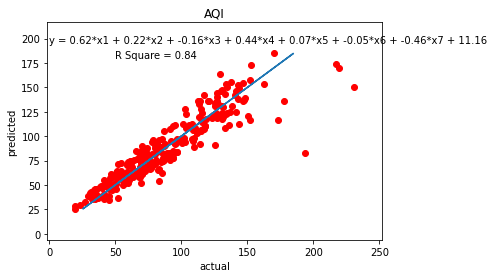

In [ ]:
y_predict = model.predict(x_test)

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('AQI')
plt.scatter(y_test,y_predict, color='r')
plt.plot(y_predict, y_predict)


plt.rcParams["figure.figsize"]=(8,5.5)
plt.text(0,195,f"y = {m[0]}*x1 + {m[1]}*x2 + {m[2]}*x3 + {m[3]}*x4 + {m[4]}*x5 + {m[5]}*x6 + {m[6]}*x7 + {round(C,2)}", fontsize=10)
plt.text(50,180,f"R Square = {round(r_test,2)}")
 
plt.margins(0.1,0.2)

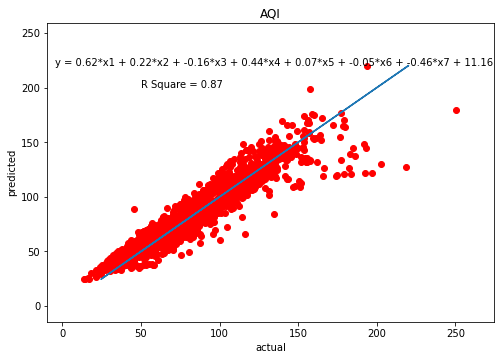

In [ ]:
y_predict = model.predict(x_train)

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('AQI')
plt.scatter(y_train,y_predict, color='r')
plt.plot(y_predict, y_predict)


plt.rcParams["figure.figsize"]=(8,5.5)
plt.text(-5,220,f"y = {m[0]}*x1 + {m[1]}*x2 + {m[2]}*x3 + {m[3]}*x4 + {m[4]}*x5 + {m[5]}*x6 + {m[6]}*x7 + {round(C,2)}", fontsize=10)
plt.text(50,200,f"R Square = {round(r_train,2)}")
 
plt.margins(0.1,0.2)

### Statistical Errors

In [ ]:
# y_predict = model.predict(x_validation)

# plt.xlabel('actual')
# plt.ylabel('predicted')
# plt.title('AQI')
# plt.scatter(y_validation,y_predict, color='r')
# plt.plot(y_predict, y_predict)

In [ ]:
y_predict_test = model.predict(x_test)
y_predict_train = model.predict(x_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mae_test = mean_absolute_error(y_test, y_predict_test)
mse_test = mean_squared_error(y_test, y_predict_test)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, y_predict_train)
mse_train = mean_squared_error(y_train, y_predict_train)
rmse_train = np.sqrt(mse_train)

<h4> Mean Absolute Error


In [ ]:
mae_test

9.846926064388994

In [ ]:
mae_train

9.07382295780598

<h4>  Mean Square Error

In [ ]:
mse_test

207.36741815335654

In [ ]:
mse_train

156.63562689354694

<h4> Root Mean Square Error

In [ ]:
rmse_test

14.400257572465728

In [ ]:
rmse_train

12.515415570149756

## **k fold** cross validation 

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

scores101 = cross_val_score(regr, x_train, y_train, cv=3,)
scores102 = cross_val_score(regr, x_test, y_test, cv=3,)
print("train : ",scores101)
print("test : ",scores102)
# scores = cross_val_score(regr,x_train, y_train, cv=5)
print("train : ",np.average(scores101))
print("test : ",np.average(scores102))

train :  [0.87335577 0.8500491  0.86836661]
test :  [0.76170951 0.84731384 0.86807338]
train :  0.8639238257763079
test :  0.8256989069270694


<br>
<br>
<br>
<br>
<br>
<br>


# Polynomial regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

<br>


### Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
X_train = sc.transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
x_train.head(1)

,PM10,NO2,SO2,Ozone,Temp,RH,WS
Date,,,,,,,
2017-11-10,111.18,28.53,4.85,33.66,24.39,65.51,0.53


In [ ]:
X_train[0]

array([ 0.87938593, -0.26127147, -0.45942392, -0.3657486 , -0.64017206,
        0.40112404, -0.20011212])

### Building Model

In [ ]:
poly_reg = PolynomialFeatures(degree=2)      # degree =2
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

# new features count
X_train_poly.shape, X_test_poly.shape

((1444, 36), (310, 36))

In [ ]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
lr.score(X_train_poly, y_train)     # train score

0.9750441346039622

In [ ]:
predict_train = lr.predict(X_train_poly)

In [ ]:
lr.score(X_test_poly, y_test)      # test score

0.973905547608123

In [ ]:
predict_test = lr.predict(X_test_poly)  

### Statistical Errors

In [ ]:
y_predict_test = lr.predict(X_test_poly)
y_predict_train = lr.predict(X_train_poly)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mae_test = mean_absolute_error(y_test, y_predict_test)
mse_test = mean_squared_error(y_test, y_predict_test)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, y_predict_train)
mse_train = mean_squared_error(y_train, y_predict_train)
rmse_train = np.sqrt(mse_train)

#### Mean Absolute Error


In [ ]:
mae_test

4.269997853868221

In [ ]:
mae_train

4.14069025299968

#### Mean Square Error

In [ ]:
mse_test

33.712646774944474

In [ ]:
mse_train

29.470650209767236

#### Root Mean Square Error

In [ ]:
rmse_test

5.806259275552933

In [ ]:
rmse_train

5.428687706045286

### Representation of Actual VS Predicted

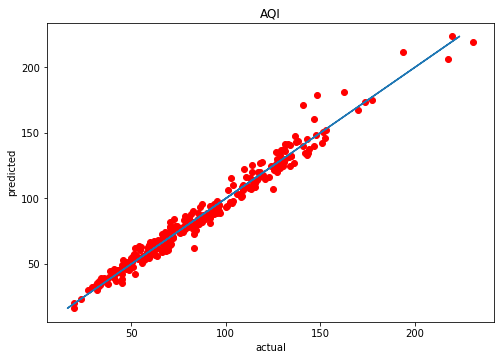

In [ ]:
# test data
y_predict = lr.predict(X_test_poly)

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('AQI')
plt.scatter(y_test,y_predict, color='r')
plt.plot(y_predict, y_predict)

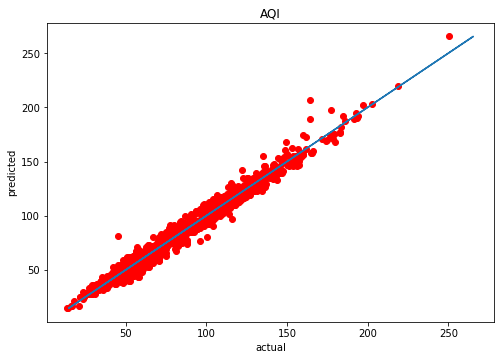

In [ ]:
# train data
y_predict = lr.predict(X_train_poly)

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('AQI')
plt.scatter(y_train,y_predict, color='r')
plt.plot(y_predict, y_predict)

### Equation

In [ ]:
lr.coef_

array([ 9.96319144e-16,  2.49124714e+01,  3.33458714e+00,  4.27894898e-01,
        5.37104724e+00, -2.32665636e-02,  1.55233734e-01, -1.98276595e-01,
        3.07730627e+00, -5.26334279e+00, -3.36420943e-01, -9.29852256e+00,
       -2.22076854e-01, -3.93837565e-01, -2.40573897e-01,  2.58021702e+00,
        1.91174065e-01, -8.08784886e-01,  1.56368840e+00,  5.85006073e-01,
       -5.10232262e-02, -2.75239845e-02,  1.73765379e-01, -4.00854113e-01,
        4.46366194e-01,  3.38971733e-01,  7.13522233e+00, -6.60853262e-01,
       -2.21646138e-02, -1.04650316e+00,  2.83437651e-01,  2.83733289e-01,
       -1.17022152e-01, -1.14013024e-01, -7.09038299e-01,  3.59565601e-02])

In [ ]:
lr.intercept_

76.3008194926406

### cross validation score

In [ ]:
from sklearn import linear_model

scores101 = cross_val_score(lr, X_train_poly, y_train, cv=3,)
scores102 = cross_val_score(lr, X_test_poly, y_test, cv=3,)
print("train : ",scores101)
print("test : ",scores102)

# scores = cross_val_score(regr,x_train, y_train, cv=5)
print("train : ",np.average(scores101))
print("test : ",np.average(scores102))

train :  [0.97076231 0.97104581 0.96959845]
test :  [0.98128589 0.9352103  0.98002704]
train :  0.9704688538726591
test :  0.965507741597785



<br>
<br>
<br>
<br>

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Y_train = y_train.astype(int)
Y_test = y_test.astype(int)

### Parameter tunning using k fold cross validation

In [ ]:
scores1 = cross_val_score(RandomForestRegressor(n_estimators=2),x_train, Y_train, cv=3)
np.average(scores1)

0.9743209924736137

In [ ]:
scores1 = cross_val_score(RandomForestRegressor(n_estimators=5),x_train,Y_train, cv=3)
np.average(scores1)

0.9747786263479097

In [ ]:
scores2 = cross_val_score(RandomForestRegressor(n_estimators=20),x_train, Y_train, cv=3)
np.average(scores2)

0.9737989039743985

In [ ]:
scores3 = cross_val_score(RandomForestRegressor(n_estimators=40),x_train, Y_train, cv=3)
np.average(scores3)

0.9780367768753319

In [ ]:
scores4 = cross_val_score(RandomForestRegressor(n_estimators=50),x_train, Y_train, cv=3)
np.average(scores4)

0.9769098469987932

In [ ]:
scores4 = cross_val_score(RandomForestRegressor(n_estimators=60),x_train, Y_train, cv=3)
np.average(scores4)

0.977367718653963

In [ ]:

scores4 = cross_val_score(RandomForestRegressor(n_estimators=80),x_train, Y_train, cv=3)
np.average(scores4)

0.9779079897255483


<br>

### Building Model

In [ ]:
model2 = RandomForestRegressor(n_estimators=50)  # Number of random trees to generate should 20 from above scores

In [ ]:
model2.fit(x_train, Y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
model2.score(x_train, Y_train)      # random forest uses decision tree so accuracy for same Data is 100%

0.9981685314151089

In [ ]:
model2.score(x_test, Y_test)

0.965490851269076

### Representation of Actual VS Predicted

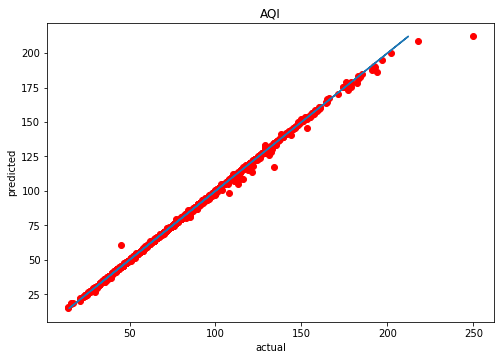

In [ ]:
y_predict = model2.predict(x_train)

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('AQI')
plt.scatter(Y_train,y_predict, color='r')
plt.plot(y_predict, y_predict)

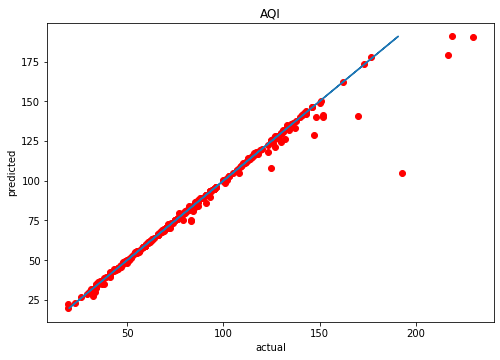

In [ ]:
y_predict = model2.predict(x_test)

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('AQI')
plt.scatter(Y_test,y_predict, color='r')
plt.plot(y_predict, y_predict)

### Statistical Errors

In [ ]:
y_predict_test = model2.predict(x_test)
y_predict_train = model2.predict(x_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mae_test = mean_absolute_error(y_test, y_predict_test)
mse_test = mean_squared_error(y_test, y_predict_test)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, y_predict_train)
mse_train = mean_squared_error(y_train, y_predict_train)
rmse_train = np.sqrt(mse_train)

In [ ]:
mae_test

1.7332089354838704

In [ ]:
mae_train

0.7392329155124656

In [ ]:
mse_test

45.885031519842265

In [ ]:
mse_train

2.5996300602713998

In [ ]:
rmse_test

6.773849091900576

In [ ]:
rmse_train

1.6123368321388059

<br><br><br><br><br>
# SVR

In [ ]:
from sklearn.svm import SVR

<br>


### Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# st_x=StandardScaler()
# st_y=StandardScaler()
# X=st_x.fit_transform(x_train)
# Y=st_y.fit_transform(y_train)

sc = StandardScaler()
sc.fit(x_train)
X_train = sc.transform(x_train)
X_test = sc.transform(x_test)

### Parameter tunning using k fold cross validation ( kernel Selection )

In [ ]:
scores1 = cross_val_score(SVR(kernel='rbf'),x_train, y_train, cv=3)
np.average(scores1)

0.8782091747753856

In [ ]:
scores2 = cross_val_score(SVR(kernel='linear'),x_train, y_train, cv=3)
np.average(scores2)

0.8184118060768037

In [ ]:
scores3 = cross_val_score(SVR(kernel='poly'),x_train, y_train, cv=3)
np.average(scores3)

0.9205285008435675

### Model Building

In [ ]:
model3 = SVR(kernel='poly')

In [ ]:
model3.fit(x_train, y_train)

SVR(kernel='poly')

In [ ]:
model3.score(x_train, y_train)

0.9312634435122114

### cross validation score

In [ ]:
scores101 = cross_val_score(model3, x_train, y_train, cv=3)
scores102 = cross_val_score(model3, x_test, y_test, cv=3)
print("train : ",scores101)
print("test : ",scores102)

# scores = cross_val_score(regr,x_train, y_train, cv=5)
print("train : ",np.average(scores101))
print("test : ",np.average(scores102))

train :  [0.90945242 0.93673201 0.91540108]
test :  [0.82390705 0.90742892 0.87586927]
train :  0.9205285008435675
test :  0.8690684161826024


### Representation of Actual VS Predicted

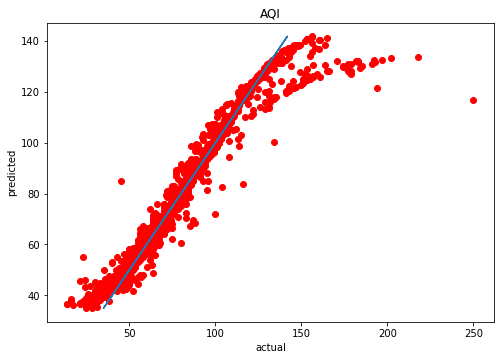

In [ ]:
y_predict = model3.predict(x_train)

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('AQI')
plt.scatter(Y_train,y_predict, color='r')
plt.plot(y_predict, y_predict)

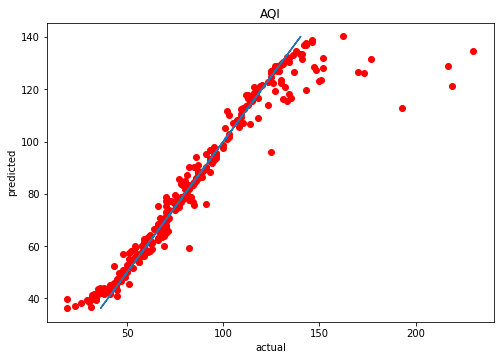

In [ ]:
y_predict = model3.predict(x_test)

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('AQI')
plt.scatter(Y_test,y_predict, color='r')
plt.plot(y_predict, y_predict)

### Statistical Errors

In [ ]:
y_predict_test = model3.predict(x_test)
y_predict_train = model3.predict(x_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mae_test = mean_absolute_error(y_test, y_predict_test)
mse_test = mean_squared_error(y_test, y_predict_test)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, y_predict_train)
mse_train = mean_squared_error(y_train, y_predict_train)
rmse_train = np.sqrt(mse_train)

In [ ]:
mae_test

5.5468554865514985

In [ ]:
mae_train

5.064583182557179

In [ ]:
mse_test

168.340738209847

In [ ]:
mse_train

108.73341140686043

In [ ]:
rmse_test

12.974619000565951

In [ ]:
rmse_train

10.427531414810527

<br><br><br><br>
# Hybrid Model (Polynomial + RF)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

<br>


### Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
X_train = sc.transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
# X_train

<h3> Polynomial Features

In [ ]:
poly_reg = PolynomialFeatures(degree=2)      # degree =2
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

# new features count
X_train_poly.shape, X_test_poly.shape

((1444, 36), (620, 36))

In [ ]:
# X_train_poly

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
### Y_train = y_train.astype(int)
### Y_test = y_test.astype(int)

### Defining Hybrid model

In [ ]:
class HBD:
  def __init__(self, model1, model2):
    self.model1 = model1
    self.model2 = model2
  
  def fit(self, x, y):
    self.model1.fit(x,y)
    y1 = self.model1.predict(x)
    self.model2.fit(y1.reshape(-1, 1),y)
  
  def predict(self, x):
    y1 = self.model1.predict(x)
    return self.model2.predict(y1.reshape(-1, 1))

  def score(self, x, y):
    y1 = self.model1.predict(x)
    return self.model2.score(y1.reshape(-1, 1),y)

### Use of Hybrid Model

In [ ]:
mymodel = HBD(LinearRegression(), RandomForestRegressor(n_estimators=30))

In [ ]:
mymodel.fit(X_train_poly, y_train)

In [ ]:
mymodel.score(X_test_poly, y_test)

0.9624621270649161

In [ ]:
mymodel.predict(X_train_poly)

array([ 70.2345    ,  69.02266667,  59.3915    , ...,  89.54333333,
        96.47341667, 107.79774333])

### Statistical Errors

In [ ]:
y_predict_test = mymodel.predict(X_test_poly)
y_predict_train = mymodel.predict(X_train_poly)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mae_test = mean_absolute_error(y_test, y_predict_test)
mse_test = mean_squared_error(y_test, y_predict_test)
rmse_test = np.sqrt(mse_test)

mae_train = mean_absolute_error(y_train, y_predict_train)
mse_train = mean_squared_error(y_train, y_predict_train)
rmse_train = np.sqrt(mse_train)

<h4> Mean Absolute Error


In [ ]:
mae_test

5.031145037813621

In [ ]:
mae_train

1.8533979078947365

<h4> Mean Square Error

In [ ]:
mse_test

47.97952604157658

In [ ]:
mse_train

6.315503115594195

<h4>  Root Mean Square Error

In [ ]:
rmse_test

6.926725492003893

In [ ]:
rmse_train

2.5130664765569164

### Representation of Actual VS Predicted

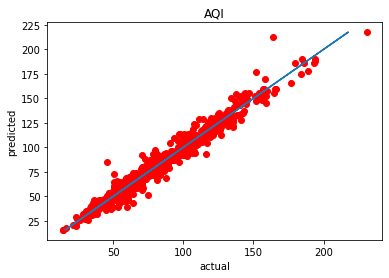

In [ ]:
# test data
y_predict = mymodel.predict(X_test_poly)

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('AQI')
plt.scatter(y_test,y_predict, color='r')
plt.plot(y_predict, y_predict)

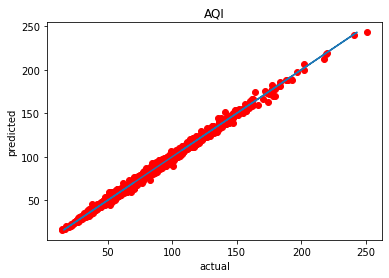

In [ ]:
# train data
y_predict = mymodel.predict(X_train_poly)

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('AQI')
plt.scatter(y_train,y_predict, color='r')
plt.plot(y_predict, y_predict)


<br>
<br>
<br>
<br>


# Predicting Quality of Air from AQI

In [ ]:
conditions = [
    (df['AQI'] <= 50),
    (df['AQI'] > 50) & (df['AQI'] <= 100),
    (df['AQI'] > 100) & (df['AQI'] <= 200),
    (df['AQI'] > 200) & (df['AQI'] <= 300),
    (df['AQI'] > 300) & (df['AQI'] <= 400),
    (df['AQI'] > 400) & (df['AQI'] <= 500)
    
    ]

values = ['GOOD', 'SATISFACTORY', 'MODERATE', 'POOR', 'VERY POOR','SEVERE']

df['Quality of Air'] = np.select(conditions, values)

In [ ]:
df

,PM10,NO2,SO2,Ozone,Temp,RH,WS,AQI,date,Quality of Air
Date,,,,,,,,,,
2016-03-30,128.32,47.91,73.43,104.06,42.10,17.98,0.72,118.8809,30-Mar-2016 - 00:00,MODERATE
2016-03-31,93.64,26.55,20.75,103.50,42.46,16.17,0.62,105.1471,31-Mar-2016 - 00:00,MODERATE
2016-04-01,116.14,98.96,13.53,31.39,38.07,17.97,0.53,118.9600,01-Apr-2016 - 00:00,MODERATE
2016-04-02,136.36,117.28,13.11,44.69,37.27,21.58,0.56,137.2800,02-Apr-2016 - 00:00,MODERATE
2016-04-03,147.09,84.06,16.81,27.49,33.12,34.27,0.45,131.3949,03-Apr-2016 - 00:00,MODERATE
...,...,...,...,...,...,...,...,...,...,...
2021-12-26,100.27,27.17,8.66,50.72,21.97,67.35,0.41,100.1800,26-Dec-2021 - 00:00,MODERATE
2021-12-27,120.54,27.38,16.76,50.63,22.38,67.90,0.40,113.6940,27-Dec-2021 - 00:00,MODERATE
2021-12-28,97.83,27.20,9.48,50.62,21.82,68.52,0.50,97.8300,28-Dec-2021 - 00:00,SATISFACTORY
